In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 5s 0us/step


In [3]:
def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return(x)

def predict_image(processed_image):
    preds = model.predict(processed_image)
    prediction = decode_predictions(preds, top=1)[0][0]
    description = prediction[1]
    probability = prediction[2]
    return(description,probability)

In [4]:
import os
import pandas as pd
from IPython.display import Image

directory = './Images/'

40960/35363 [==================================] - 0s 1us/step


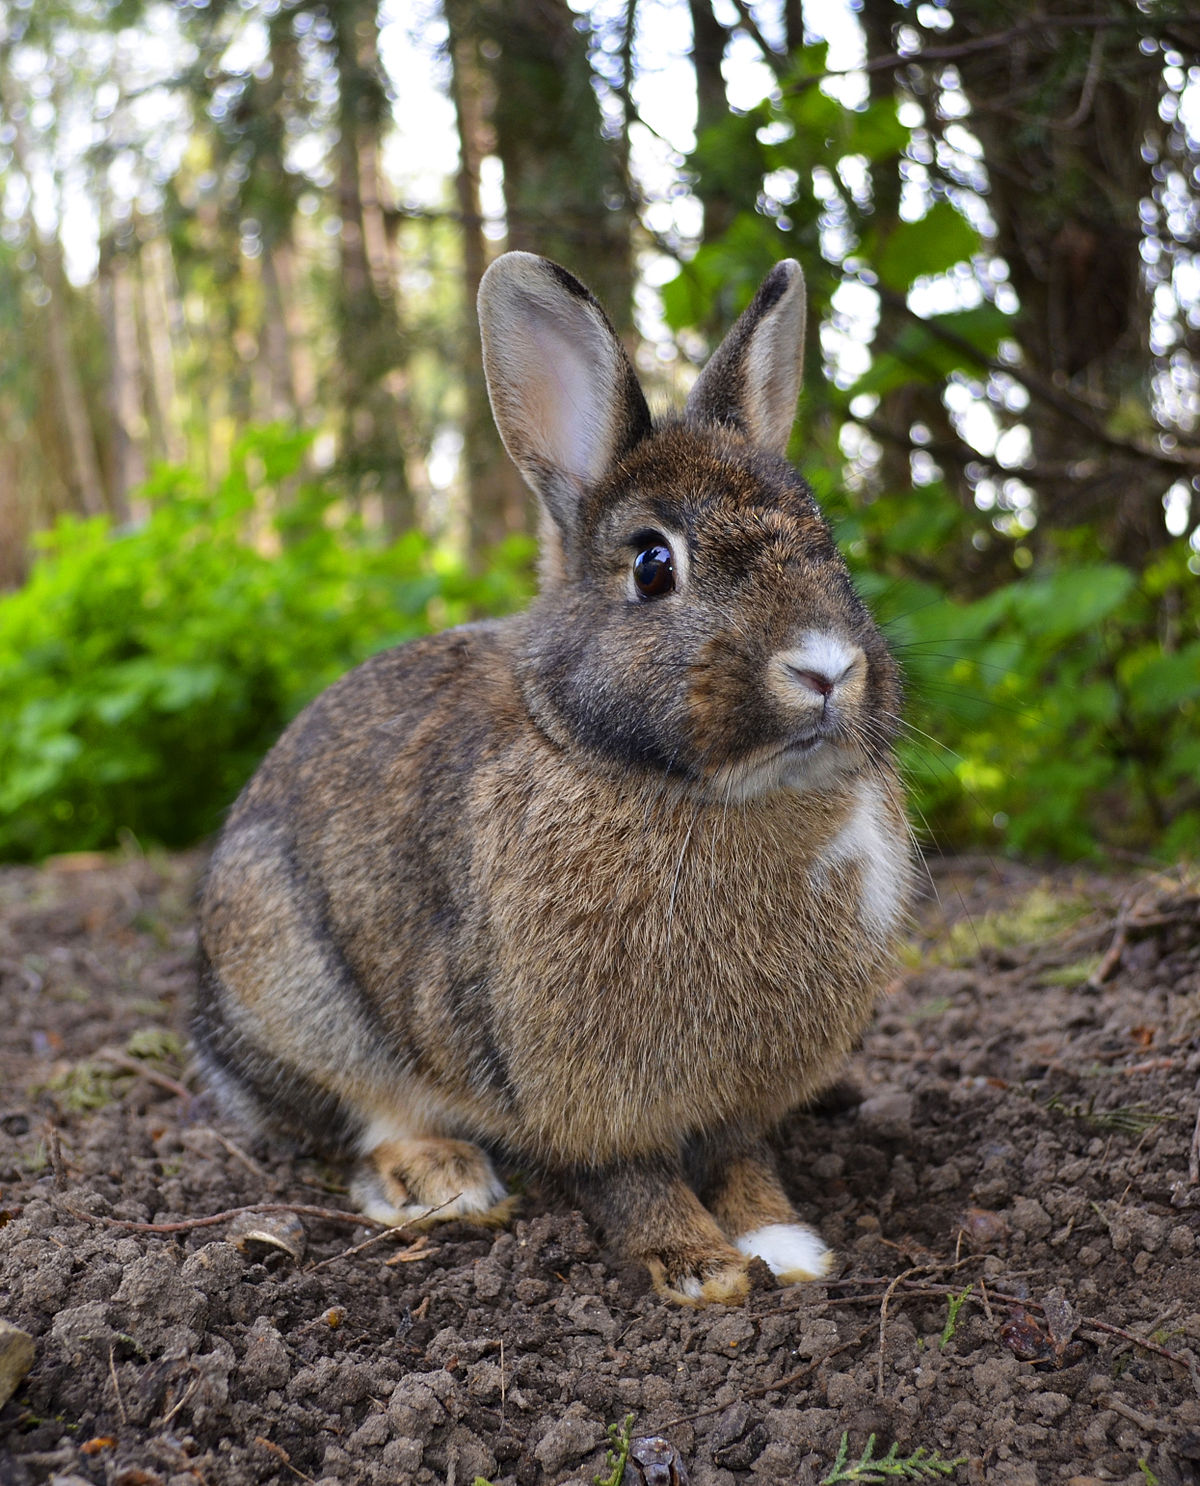

Filename: rabbit.jpg
Description: hare
Probability: 0.5346378087997437
-----------------------------


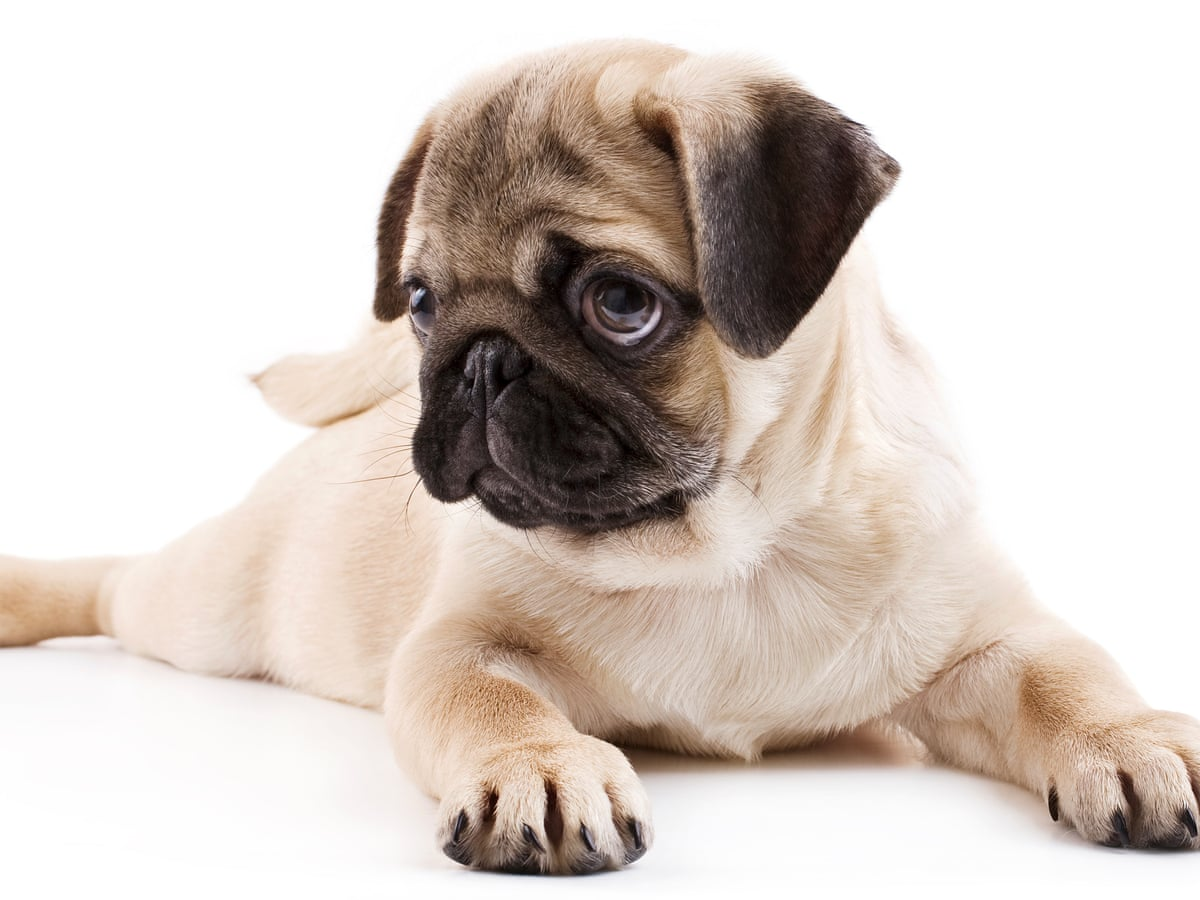

Filename: dog.jpg
Description: pug
Probability: 0.8428003191947937
-----------------------------


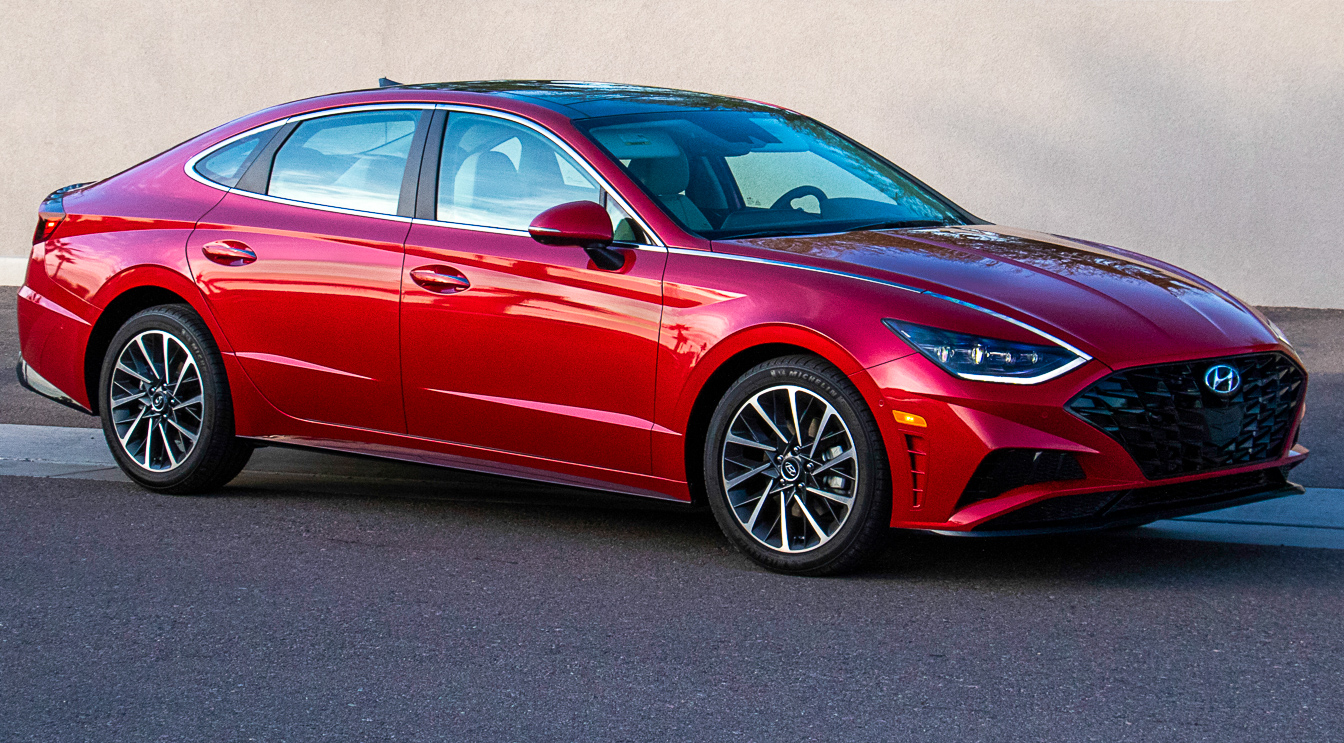

Filename: car.jpg
Description: sports_car
Probability: 0.8744170665740967
-----------------------------


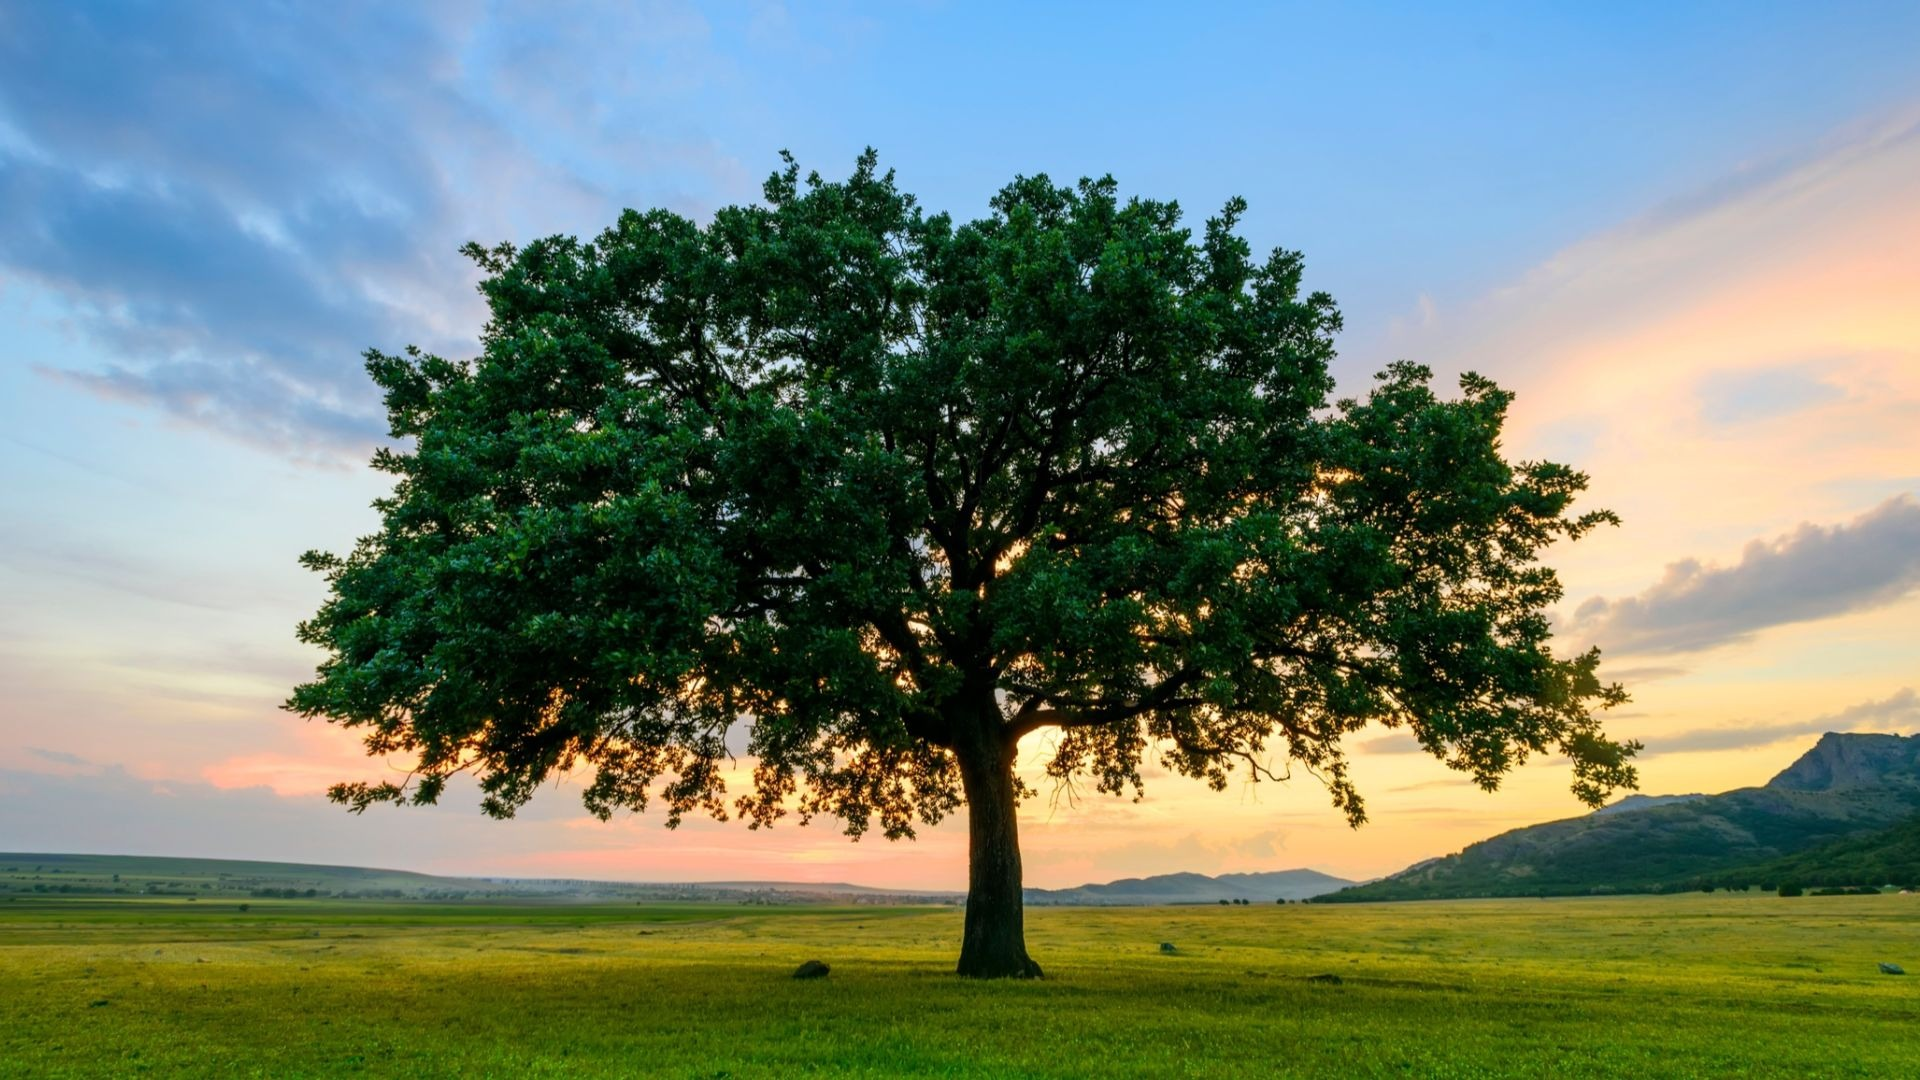

Filename: tree.jpg
Description: lakeside
Probability: 0.4547659456729889
-----------------------------


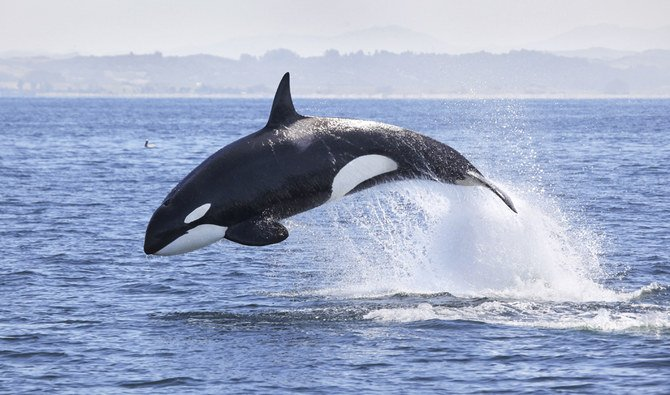

Filename: whale.jpg
Description: killer_whale
Probability: 0.9984151124954224
-----------------------------


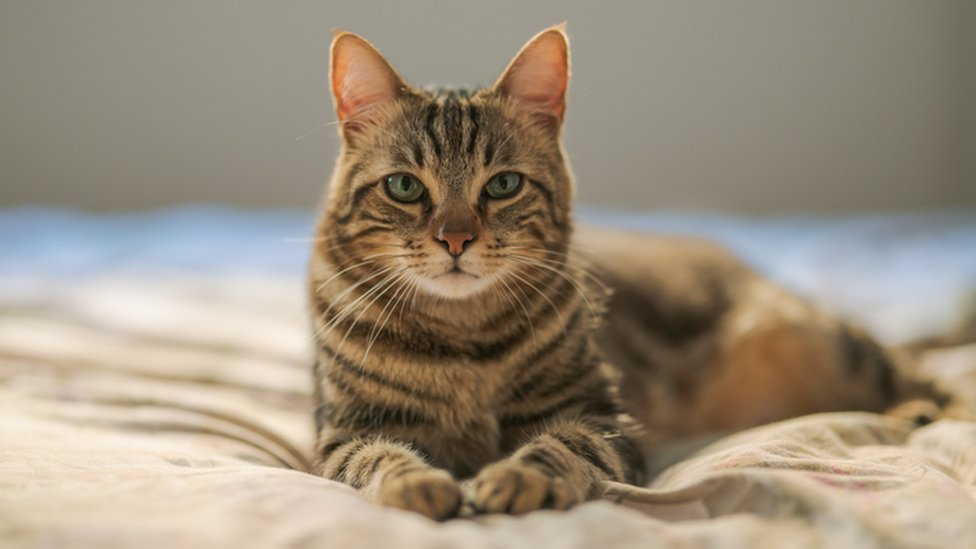

Filename: cat.jpg
Description: Egyptian_cat
Probability: 0.42385780811309814
-----------------------------


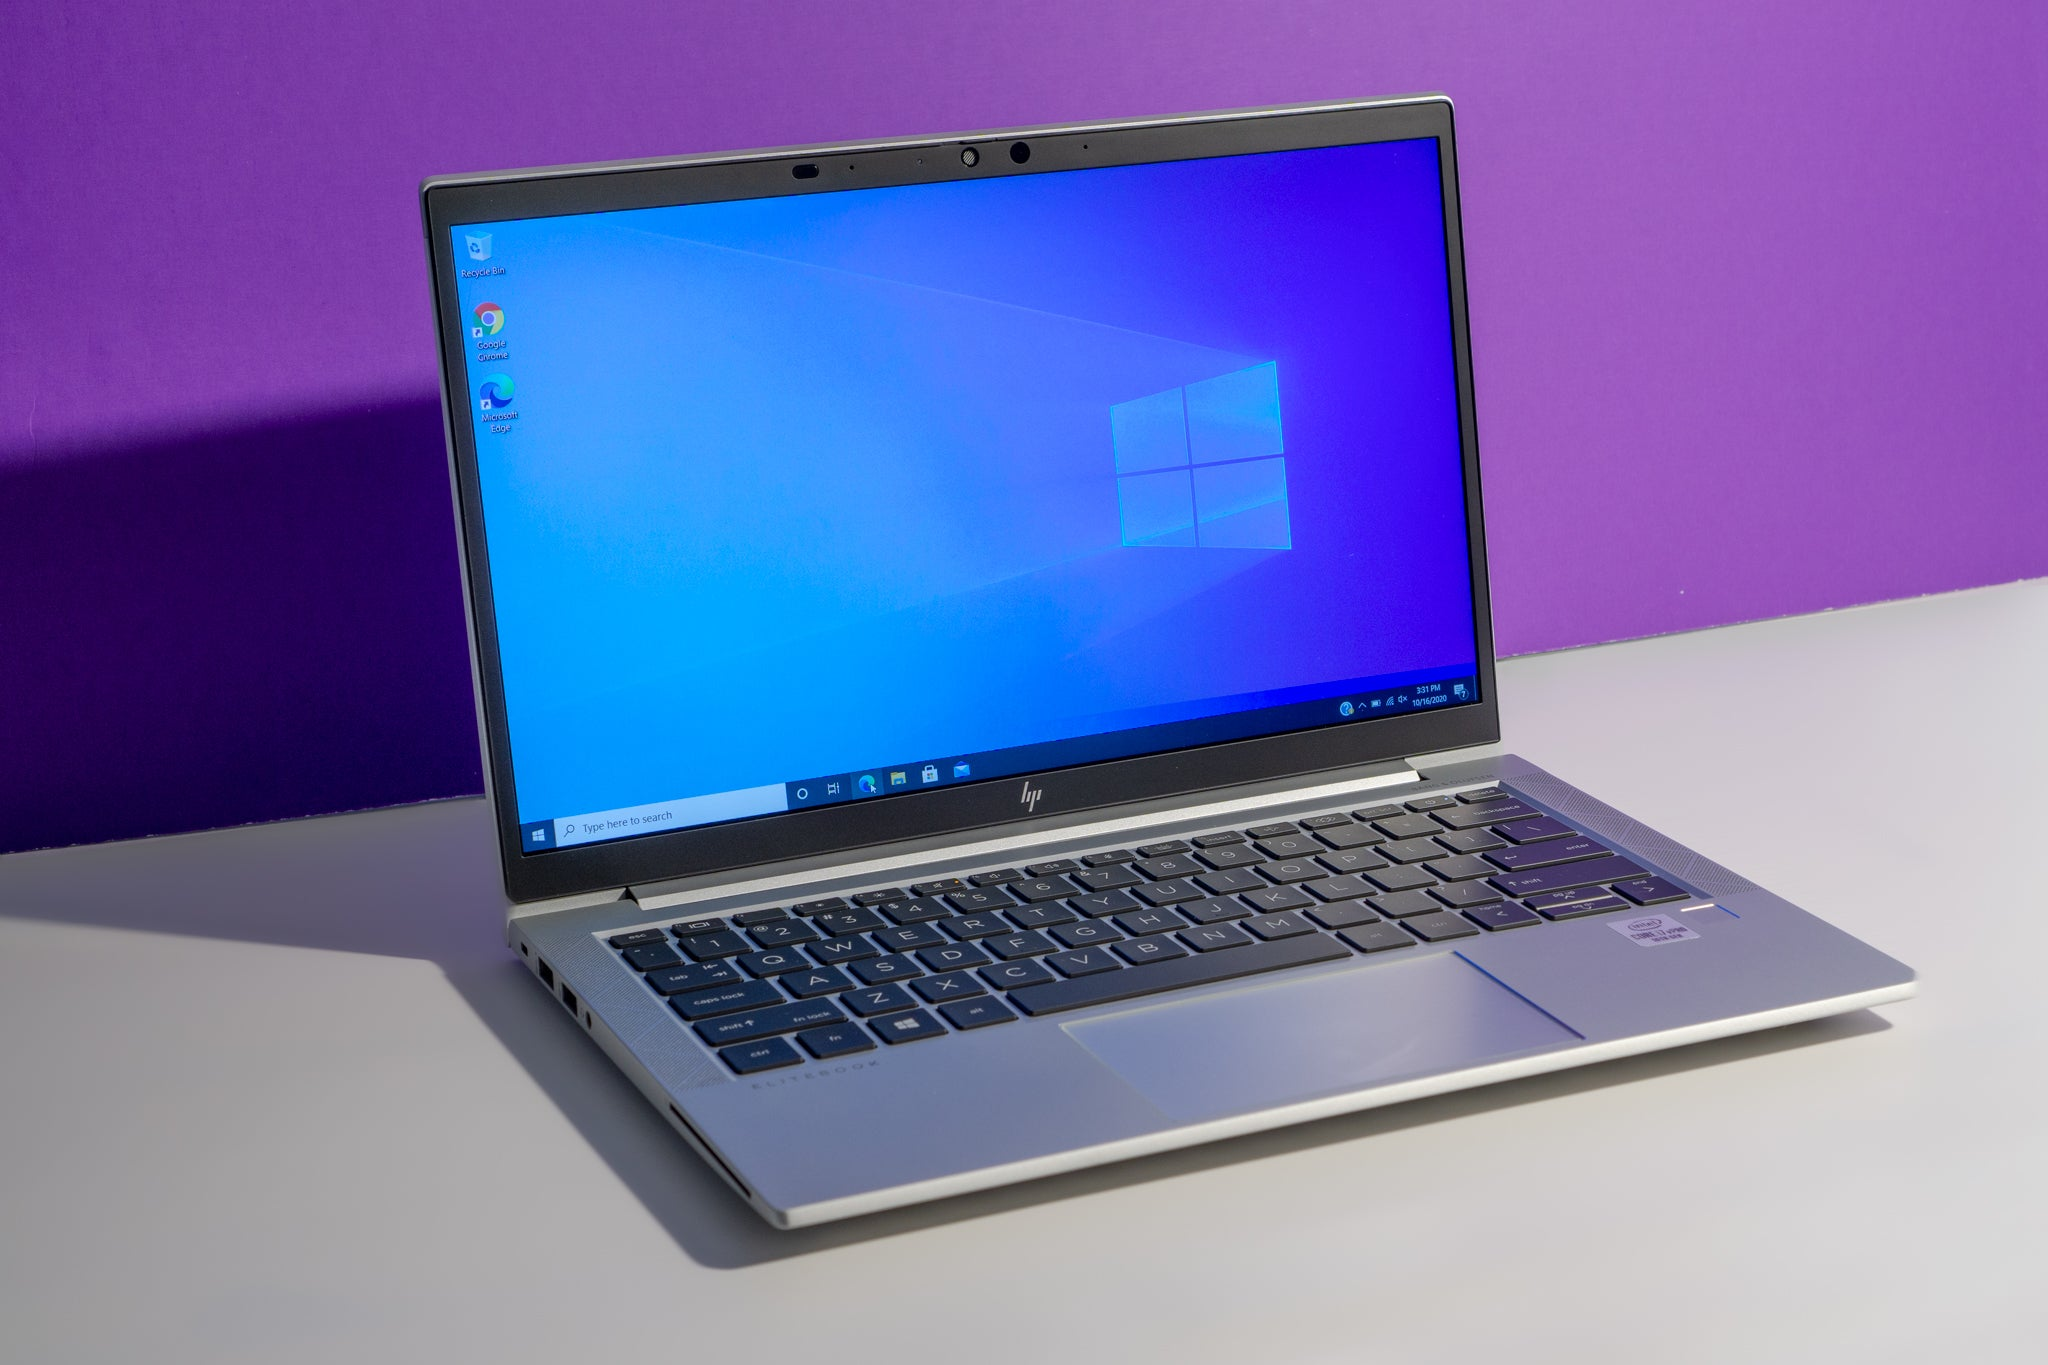

Filename: laptop.jpg
Description: laptop
Probability: 0.5676842927932739
-----------------------------


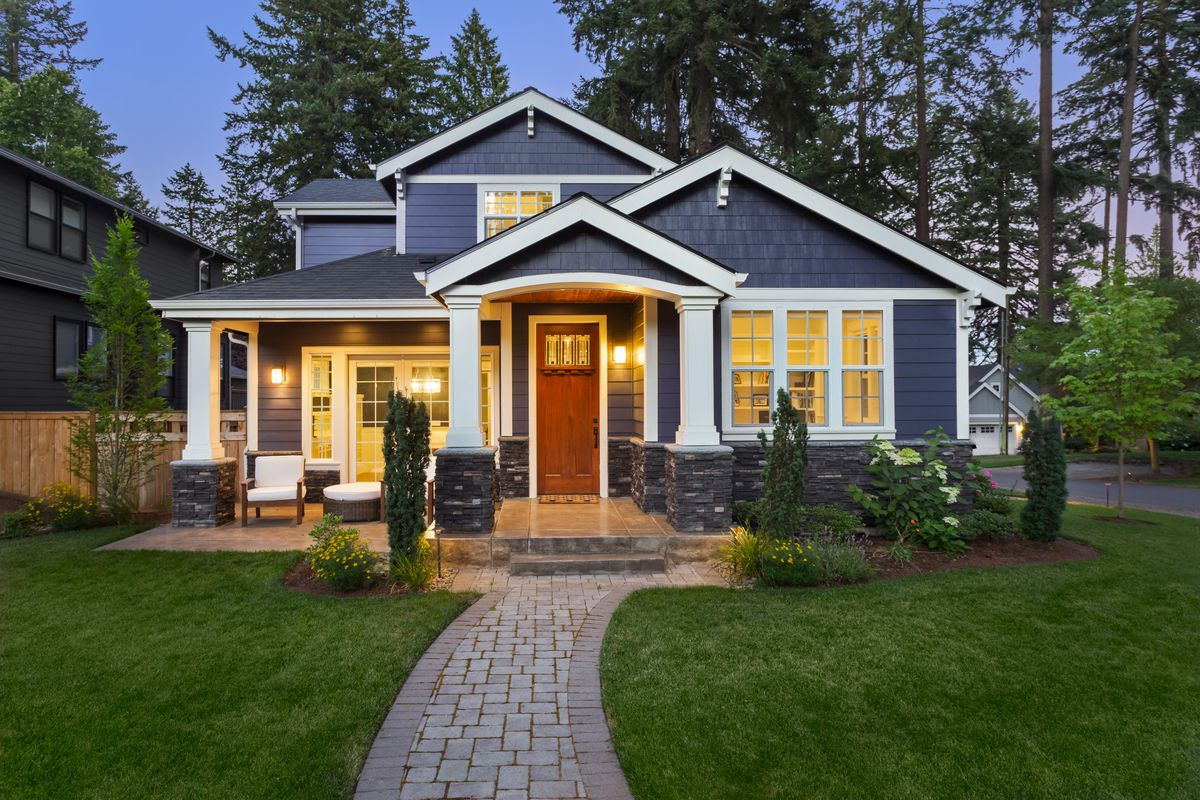

Filename: house.jpg
Description: picket_fence
Probability: 0.5864676833152771
-----------------------------


In [7]:
for filename in os.listdir(directory):
    img = process_image(f'{directory}{filename}')
    (description,probability) = predict_image(img)
    Image(filename=f'{directory}{filename}') 
    print(f'Filename: {filename}\nDescription: {description}\nProbability: {probability}\n-----------------------------')